The problem is the data, I dont know if is that the customers buy just one or the problem is the id, and every time one customer enter it is asing a diferent id and there is no validation about if the customer is returning or not.

We know the frecuency is 0 therefore the CLV will be 0 as well. And its affect Cohort analysis as well.

To solve this, we need to:

1. Validate data quality: check for missing values, outliers, and duplicates.
2. Base the analysis over the returnning customers.
3. The tendency shows an increase number of orders and this is the proof that the customer is returning.
    * Validate the customer_id, if the customer is returning, then the customer_id should be the same as the previous one.

4. If the unique customer_id is not an error and it is not a returning customer:
    * A/B with the hipotesis that if we offer more installment plans the customer will return more.

    H_0: "If offering more installment plans the customer will return more."\
    H_1: "If offering more installment plans the customer will not make a differece."

## Libraries

In [53]:
import sys
sys.path.append('scripts')

import pandas as pd
import numpy as np
import warnings

# Suppress all UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
%load_ext autoreload
%autoreload 3
from utils import *
from key_metrics import *

Database found at: c:\Users\kenia\OneDrive\Documents\GitHub\cobre\scripts\..\data\olist.sqlite


In [3]:
%reload_ext autoreload

## Load data

At the moment of loading data automatically is generated an express and basic EDA analysis

In [4]:
orders_df = load_table('orders')
order_payments_df = load_table('order_payments')
customers_df = load_table('customers')
products_df = load_table('products')
order_items_df = load_table('order_items')
order_reviews_df = load_table('order_reviews')
product_category_name_translation_df = load_table('product_category_name_translation')
sellers_df = load_table('sellers')
geolocation_df = load_table('geolocation')
leads_qualified_df = load_table('leads_qualified')
leads_closed_df = load_table('leads_closed')
# customer = customer_view()

In [5]:
# basic preprocessing
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

leads_qualified_df['first_contact_date'] = pd.to_datetime(leads_qualified_df['first_contact_date'])
leads_closed_df['won_date'] = pd.to_datetime(leads_closed_df['won_date'])

In [6]:
pyments_categorical_cols = explore_dataframe(order_payments_df, 'order_payments', detailed=True)
orders_categorical_cols = explore_dataframe(orders_df, 'orders', detailed=True)
order_items_categorical_cols = explore_dataframe(order_items_df, 'order_items', detailed=True)
order_reviews_categorical_cols= explore_dataframe(order_reviews_df, 'order_reviews', detailed=True)
products_categorical_cols = explore_dataframe(products_df, 'products', detailed=True)
product_category_name_translation_categorical_cols = explore_dataframe(product_category_name_translation_df, 'product_category_name_translation', detailed=True)
sellers_categorical_cols = explore_dataframe(sellers_df, 'sellers', detailed=True)
geolocalization_categorical_cols = explore_dataframe(geolocation_df, 'geolocation', detailed=True)
leads_qualified_categorical_cols = explore_dataframe(leads_qualified_df, 'leads_qualified', detailed=True)
leads_closed_categorical_cols = explore_dataframe(leads_closed_df, 'leads_closed', detailed=True)



DATAFRAME EXPLORATION REPORT - ORDER_PAYMENTS

Dataset shape: 103886 rows × 5 columns
Memory usage: 17.81 MB

────────────────────────────────────────────────────────────
DETAILED COLUMN ANALYSIS
────────────────────────────────────────────────────────────

DATAFRAME STRUCTURE ANALYSIS

Total columns: 5
Total rows: 103886

Column type distribution:
likely_type
Numeric        3
ID             1
Categorical    1
Name: count, dtype: int64

Column Details:
            column_name data_type  null_count null_percentage  unique_count unique_percentage                                                                                           sample_values  likely_type  min       max        mean  median
0              order_id    object           0            0.0%         99440             95.7%  [b81ef226f3fe1789b1e8b2acac839d17, a9810da82917af2d9aefd1278f1dcfa0, 25e8ea4e93396b6fa0d3dd708e76c1bd]           ID  NaN       NaN         NaN     NaN
1    payment_sequential     int64           0     

## General Metrics

In [7]:
conversion_rate_by_payment_method(orders_df, order_payments_df)

,payment_type,conversion_rate,total_payment_value
1,credit_card,0.769351,12542084.19
0,boleto,0.198952,2869361.27
4,voucher,0.038877,379436.87
2,debit_card,0.015366,217989.79
3,not_defined,0.000030,0.00


In [8]:
effectiveness_rate, promotions_by_seller, promotions_by_category = promotions_effectiveness_analysis(orders_df, order_payments_df, order_items_df, sellers_df, products_df, product_category_name_translation_df)
print(f"Overall Effectiveness Rate of Promotions: {effectiveness_rate:.2%}")
display(promotions_by_seller.head(), promotions_by_category.head())

Overall Effectiveness Rate of Promotions: 3.89%


,seller_id,promo_orders_count,total_orders,promo_effectiveness_rate
1017,fa18c782a4866d313cadab567097f8f1,1,1,1.0
1027,fc0b214b59a83615fea981c6424a02ae,1,1,1.0
411,6576fd3e23c88f0e5d4d23f39bba0542,1,1,1.0
175,28d162ab86bb49d719c32f0ee6186eaa,1,1,1.0
139,1fe61aa5494bd3ae92a2c13e067c810f,1,1,1.0


,product_category_name_english,promo_orders_count,total_orders,promo_effectiveness_rate
47,la_cuisine,2,13,0.153846
26,fashion_male_clothing,10,112,0.089286
41,home_comfort_2,2,24,0.083333
25,fashion_bags_accessories,132,1864,0.070815
29,fashion_underwear_beach,8,121,0.066116


In [9]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [10]:
summary_df, metrics_dict, time_series_df = order_status_analysis(orders_df, order_items_df, customers_df, products_df)
summary_df

,order_status,total_orders,unique_customers,percentage
2,created,5,5,0.01
0,approved,2,2,0.00
4,invoiced,314,314,0.32
5,processing,301,301,0.30
6,shipped,1107,1107,1.11
3,delivered,96478,96478,97.02
7,unavailable,609,609,0.61
1,canceled,625,625,0.63


In [11]:
metrics_dict

{'total_orders': 99441,
 'delivered_rate': 97.02,
 'canceled_rate': 0.63,
 'in_transit': 1408,
 'pending_approval': 5}

In [12]:
time_series_df

order_status,date,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
0,2016-09-04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2016-09-05,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-09-13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-09-15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2016-10-02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
629,2018-09-29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
630,2018-10-01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
631,2018-10-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
632,2018-10-16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
funnel_df, dict_funnel = order_fulfillment_funnel(orders_df)
print(dict_funnel)
funnel_df

{'canceled_count': 625, 'canceled_rate': 0.6285133898492574}


,stage,count,percentage
0,Created,5,0.005028
1,Approved,2,0.002011
2,Invoiced,314,0.315765
3,Shipped,1107,1.113223
4,Delivered,96478,97.020344


In [14]:
delivery_performance_by_state(orders_df, customers_df)

,state,total_orders,delivery_rate,cancellation_rate,in_transit
0,AC,81.0,98.77,0.00,1.0
3,AP,68.0,98.53,0.00,1.0
7,ES,2033.0,98.13,0.44,19.0
11,MS,715.0,98.04,0.28,6.0
2,AM,148.0,97.97,0.00,2.0
26,TO,280.0,97.86,0.36,4.0
22,RS,5466.0,97.79,0.46,51.0
19,RN,485.0,97.73,0.00,8.0
12,MT,907.0,97.68,0.22,15.0
17,PR,5045.0,97.58,0.44,44.0


In [21]:
satisfaction_summary, review_insights, top_narratives = customer_satisfaction_analysis(order_reviews_df)
satisfaction_summary

,review_score,total_reviews,reviews_with_title,reviews_with_message,percentage,satisfaction_level,comment_rate
0,1,11424,1873,8745,11.51,Very Dissatisfied,76.55
1,2,3151,478,2145,3.18,Dissatisfied,68.07
2,3,8179,824,3557,8.24,Neutral,43.49
3,4,19142,1735,5976,19.29,Satisfied,31.22
4,5,57328,6658,20554,57.78,Very Satisfied,35.85


In [22]:
review_insights

{'total_reviews': 99224,
 'avg_score': np.float64(4.08642062404257),
 'satisfaction_rate': np.float64(77.06804805289042),
 'dissatisfaction_rate': np.float64(14.688986535515603),
 'reviews_with_comments': np.int64(40977),
 'comment_rate': np.float64(41.29746835443038),
 'median_score': np.float64(5.0),
 'score_std': np.float64(1.3475791311150982),
 'nps_score': np.float64(62.379061517374836),
 'engaged_customers': 42559}

In [23]:
top_narratives

{'positive_themes': [{'theme': 'product',
   'mentions': 10663,
   'percentage': 40.19},
  {'theme': 'deadline', 'mentions': 7024, 'percentage': 26.48},
  {'theme': 'delivery', 'mentions': 4856, 'percentage': 18.3},
  {'theme': 'excellent', 'mentions': 4185, 'percentage': 15.77},
  {'theme': 'good', 'mentions': 3941, 'percentage': 14.85},
  {'theme': 'arrived', 'mentions': 3928, 'percentage': 14.81},
  {'theme': 'recommend', 'mentions': 3870, 'percentage': 14.59}],
 'negative_themes': [{'theme': 'not', 'mentions': 6496, 'percentage': 59.65},
  {'theme': 'product', 'mentions': 5785, 'percentage': 53.12},
  {'theme': 'delivery', 'mentions': 1763, 'percentage': 16.19},
  {'theme': 'arrived', 'mentions': 1112, 'percentage': 10.21},
  {'theme': 'deadline', 'mentions': 876, 'percentage': 8.04},
  {'theme': 'return', 'mentions': 451, 'percentage': 4.14},
  {'theme': 'quality', 'mentions': 421, 'percentage': 3.87}],
 'improvement_areas': [{'area': 'return',
   'frequency': 451,
   'priority': 

In [24]:
review_sentiment_trends(order_reviews_df, orders_df)

c:\Users\kenia\OneDrive\Documents\GitHub\cobre\scripts\key_metrics.py:912: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_sentiment['satisfaction_rate'] = reviews_with_dates.groupby('review_month').apply(
c:\Users\kenia\OneDrive\Documents\GitHub\cobre\scripts\key_metrics.py:917: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_sentiment['nps'] = reviews_with_dates.groupby('review_month').apply(


,review_month,avg_score,total_reviews,score_std,reviews_with_comments,satisfaction_rate,nps
0,2016-09,1.00,4,0.00,4,0.00,-100.0
1,2016-10,3.57,321,1.69,234,64.17,35.0
2,2016-12,5.00,1,NaN,1,100.00,100.0
3,2017-01,4.07,797,1.37,372,76.16,61.0
4,2017-02,4.02,1776,1.39,807,74.32,58.0
5,2017-03,4.07,2676,1.34,1147,76.64,62.0
6,2017-04,4.04,2394,1.35,1008,75.65,60.0
7,2017-05,4.14,3703,1.28,1527,78.45,66.0
8,2017-06,4.15,3250,1.29,1366,78.58,66.0
9,2017-07,4.17,4032,1.26,1720,79.04,67.0


## RFM

In [ ]:
filtered_orders = orders_df.copy()
reference_date = filtered_orders['order_purchase_timestamp'].max()

orders_with_value = filtered_orders.merge(
        order_payments_df.groupby('order_id')['payment_value'].sum().reset_index(),
        on='order_id',
        how='left'
    )

rfm = orders_with_value.groupby('customer_id').agg({
        'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
        'order_id': 'nunique',  # Frequency
        'payment_value': 'sum'  # Monetary
    }).reset_index()

rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

if rfm['recency'].nunique() > 1:
    rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, labels=['4', '3', '2', '1'])
else:
    rfm['r_quartile'] = '1'  # o cualquier valor fijo

if rfm['frequency'].nunique() > 1:
    rfm['f_quartile'] = pd.qcut(rfm['frequency'], q=4, labels=['1', '2', '3', '4'])
else:
    rfm['f_quartile'] = '1'  # o cualquier valor fijo
if rfm['monetary'].nunique() > 1:
    rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, labels=['1', '2', '3', '4'])
else:
    rfm['m_quartile'] = '1'  # o cualquier valor fijo

rfm['rfm_score'] = rfm['r_quartile'].astype(str) + rfm['f_quartile'].astype(str) + rfm['m_quartile'].astype(str)

In [47]:
rfm

,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,00012a2ce6f8dcda20d059ce98491703,337,1,114.74,2,1,3,213
1,000161a058600d5901f007fab4c27140,458,1,67.41,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,596,1,195.42,1,1,4,114
3,0002414f95344307404f0ace7a26f1d5,427,1,179.35,1,1,4,114
4,000379cdec625522490c315e70c7a9fb,198,1,107.01,3,1,3,313
...,...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,202,1,81.36,3,1,2,312
99437,fffeda5b6d849fbd39689bb92087f431,148,1,63.13,4,1,2,412
99438,ffff42319e9b2d713724ae527742af25,126,1,214.13,4,1,4,414
99439,ffffa3172527f765de70084a7e53aae8,410,1,45.50,1,1,1,111


## Cohorts

In [39]:
from ydata_profiling import ProfileReport

c:\Users\kenia\anaconda3\envs\cobre\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
aux = pd.read_csv('data/olist_closed_deals_dataset.csv')

profile = ProfileReport(aux, title="Closed Deals Dataset (AUX) Profiling Report")
profile.to_file(f"data/aux_closed_deals_report.html")

aux.head()

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 220.74it/s]


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [ ]:
df = orders_df.copy()
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

revenue_by_order = order_payments_df.groupby('order_id')['payment_value'].sum().reset_index()
df = df.merge(revenue_by_order, on='order_id', how='left')
df['payment_value'] = df['payment_value'].fillna(0)


In [34]:
df['customer_id'].nunique(), df.shape[0]

(99441, 99441)

In [ ]:
#months
df['order_period'] = df['order_purchase_timestamp'].dt.to_period('M')
df['cohort'] = df.groupby('customer_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
df['cohort_index'] = (df['order_period'] - df['cohort']).apply(lambda x: x.n if hasattr(x, 'n') else 0)

In [29]:
df['cohort_index'].unique()

array([0])

In [28]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_value,order_period,cohort,cohort_index
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,38.71,2017-10,2017-10,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46,2018-07,2018-07,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12,2018-08,2018-08,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,72.20,2017-11,2017-11,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,28.62,2018-02,2018-02,0


In [31]:
# Definir periodos
df['order_period'] = df['order_purchase_timestamp'].dt.to_period('W')
df['cohort'] = df.groupby('customer_id')['order_purchase_timestamp'].transform('min').dt.to_period('W')

# Calcular diferencia en meses
df['cohort_index'] = (df['order_period'].dt.year - df['cohort'].dt.year) * 12 + \
                     (df['order_period'].dt.month - df['cohort'].dt.month) + 1
df['cohort_index'].unique()

array([1])

## CLV

In [48]:
def clv_tier(value):
    if value >= customer_purchases['predicted_clv'].quantile(0.8):
        return 'High Value'
    elif value >= customer_purchases['predicted_clv'].quantile(0.5):
        return 'Medium Value'
    else:
        return 'Low Value'

In [55]:
orders_with_value = orders_df.merge(
    order_payments_df.groupby('order_id')['payment_value'].sum().reset_index(),
    on='order_id',
    how='left'
)

customer_purchases = orders_with_value.groupby('customer_id').agg({
    'order_purchase_timestamp': ['min', 'max', 'count'],
    'payment_value': ['sum', 'mean']
}).reset_index()

customer_purchases.columns = ['customer_id', 'first_purchase', 'last_purchase', 
                                'purchase_count', 'total_value', 'avg_order_value']

customer_purchases['customer_age_days'] = (
    customer_purchases['last_purchase'] - customer_purchases['first_purchase']
).dt.days

customer_purchases['customer_age_months'] = customer_purchases['customer_age_days'] / 30

customer_purchases['purchase_frequency'] = np.where(
    customer_purchases['purchase_count'] > 1,
    customer_purchases['purchase_count'] / customer_purchases['customer_age_months'],
    0
)
customer_purchases['predicted_purchases'] = (
        customer_purchases['purchase_frequency'] * 3
    )
customer_purchases['predicted_clv'] = (
    customer_purchases['predicted_purchases'] * customer_purchases['avg_order_value']
)

customer_purchases['clv_tier'] = customer_purchases['predicted_clv'].apply(clv_tier)


In [56]:
customer_purchases

,customer_id,first_purchase,last_purchase,purchase_count,total_value,avg_order_value,customer_age_days,customer_age_months,purchase_frequency,predicted_purchases,predicted_clv,clv_tier
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,2017-11-14 16:08:26,1,114.74,114.74,0,0.0,0.0,0.0,0.0,High Value
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,2017-07-16 09:40:32,1,67.41,67.41,0,0.0,0.0,0.0,0.0,High Value
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,2017-02-28 11:06:43,1,195.42,195.42,0,0.0,0.0,0.0,0.0,High Value
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,2017-08-16 13:09:20,1,179.35,179.35,0,0.0,0.0,0.0,0.0,High Value
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,2018-04-02 13:42:17,1,107.01,107.01,0,0.0,0.0,0.0,0.0,High Value
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,2018-03-29 16:59:26,1,81.36,81.36,0,0.0,0.0,0.0,0.0,High Value
99437,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,2018-05-22 13:36:02,1,63.13,63.13,0,0.0,0.0,0.0,0.0,High Value
99438,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,2018-06-13 16:57:05,1,214.13,214.13,0,0.0,0.0,0.0,0.0,High Value
99439,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,2017-09-02 11:53:32,1,45.50,45.50,0,0.0,0.0,0.0,0.0,High Value


In [57]:
freq_q99 = customer_purchases['purchase_frequency'].quantile(0.99)
clv_q99 = customer_purchases['predicted_clv'].quantile(0.99)
plot_data = customer_purchases[(customer_purchases['purchase_frequency'] <= freq_q99) & 
                    (customer_purchases['predicted_clv'] <= clv_q99)]

In [58]:
z = np.polyfit(plot_data['purchase_frequency'], plot_data['predicted_clv'], 1)

c:\Users\kenia\anaconda3\envs\cobre\lib\site-packages\numpy\lib\_polynomial_impl.py:665: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

##  A/B Testing
If we offer more installment plans the customer will return more.

    H_0: "If offering more installment plans the customer will return more."
    H_1: "If offering more installment plans the customer will not make a differece."

We use a proxy index as an indicator of customer return intent within 60 days post-purchase.

In [ ]:
# in-time delivery delay
delivery_delays = (orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']).dt.days

# satisfaction expressed by customer
satisfaction_scores = order_reviews_df['review_score']

# credit card usage



## Forecasting

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

c:\Users\kenia\anaconda3\envs\cobre\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [ ]:
df = pd.merge(order_items_df, orders_df, on='order_id')
df['revenue'] = df['price'] - df['freight_value']

daily_revenue = df.groupby(df['order_purchase_timestamp'].dt.date)['revenue'].sum().reset_index()
daily_revenue.columns = ['ds', 'y']  # Prophet requiere estas columnas

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,45.61
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,219.97
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,181.13
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,0.20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,181.76


In [ ]:
df['revenue'].min(), df['revenue'].max(), df['revenue'].mean()

(np.float64(-140.53), np.float64(6540.69), np.float64(100.66341908566356))

In [ ]:
daily_revenue.head()

,ds,y
0,2016-09-04,9.55
1,2016-09-05,43.94
2,2016-09-15,126.48
3,2016-10-02,90.66
4,2016-10-03,331.82


18:31:35 - cmdstanpy - INFO - Chain [1] start processing
18:31:35 - cmdstanpy - INFO - Chain [1] done processing


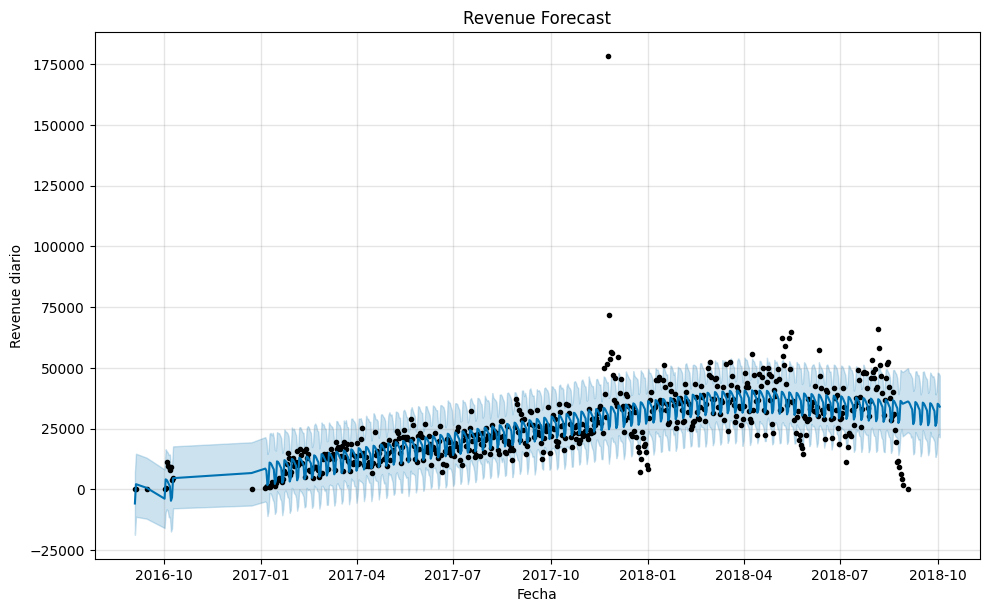

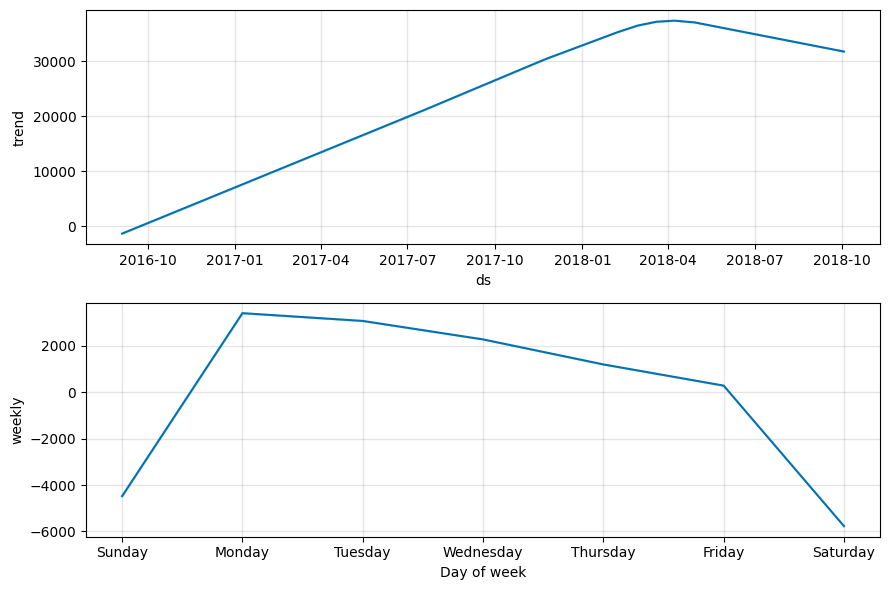

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Paso 1: Unir tablas y calcular revenue por pedido
# Suponiendo que ya tienes los DataFrames: orders, order_items

# Merge para unir order_items con orders
df = pd.merge(order_items_df, orders_df, on='order_id')

# Crear columna de revenue
df['revenue'] = df['price'] + df['freight_value']

# Paso 2: Agregar revenue por día
daily_revenue = df.groupby(df['order_purchase_timestamp'].dt.date)['revenue'].sum().reset_index()
daily_revenue.columns = ['ds', 'y']  # Prophet requiere estas columnas

# Paso 3: Entrenar modelo Prophet
model = Prophet()
model.fit(daily_revenue)

# Paso 4: Crear fechas futuras y predecir
future = model.make_future_dataframe(periods=30)  # 30 días hacia adelante
forecast = model.predict(future)

# Paso 5: Visualizar resultados
fig1 = model.plot(forecast)
plt.title('Revenue Forecast')
plt.xlabel('Fecha')
plt.ylabel('Revenue diario')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()
